In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

### Дополнительная литература

1. `https://www.helenkapatsa.ru/razvedochnyy-analiz-dannykh-chast-1/`

2. `https://www.helenkapatsa.ru/razvedochnyy-analiz-dannykh-chast-2/`

## Описание данных

 - `Округ` - округ Москвы, в котором расположена квартира
 
 
 - `Ближайшая станция метро` - ближайшая станция метро, рядом с которой расположен ЖК
 - `Время до метро` - кратчайшее время пешком до метро
 - `Метро рядом` - количество станций метро расположенных в пешей доступности
 - `Застройщик` - застройщик дома
 - `ЖК` - жилой комплекс, в котором расположена квартира
 - `Класс` - класс жилья
 - `Тип квартиры` - тип жилплощади (квартира, апартаменты, студия)
 - `Этаж` - этаж, на котором расположена квартира
 - `Этажей в доме` - количеств этажей в доме
 - `Отделка` - тип отделки квартиры (без отделки, чистовая, предчитовая и тд)
 - `Количество комнат` - количество комнат в квартире
 - `Площадь квартиры` - суммарная площадь квартиры
 - `Жилая площадь` - жилая площадь из всей площади квартиры
 - `Площадь кухни` - площадь кухни
 - `Тип дома` - из чего сделан дом
 - `Парковка` - наличие и вид парковки 
 - `Год сдачи` - когда был сдан или будет 
 - `Цена` - цена квартиры 

# EDA

Для начала посмотрим на полученные данные:

In [121]:
df = pd.read_csv('cian_data.csv')
df.head(10)

,Округ,Ближайшая станция метро,Время до метро,Метро рядом,Застройщик,ЖК,Класс,Тип квартиры,Этаж,Этажей в доме,Отделка,Количество комнат,Площадь квартиры,Жилая площадь,Площадь кухни,Тип дома,Парковка,Год сдачи,Цена
0,СВАО,Марьина роща,17.0,2,Компания Пионер,«PRIDE (Прайд)»,Премиум,квартира,5.0,22.0,Без отделки,1.0,32.20,NaN,NaN,Монолитный,Подземная,2025.0,16 106 665
1,СЗАО,Трикотажная,4.0,3,СК Резиденс,«ÁLIA (АЛИЯ)»,Бизнес,квартира,2.0,26.0,Неизвестно,1.0,48.06,NaN,NaN,Монолитно-кирпичный,"Подземная, гостевая",2023.0,16 122 800
2,САО,Тимирязевская,3.0,3,MR Group,«SYMPHONY 34 (Симфони 34)»,Премиум,квартира,2.0,36.0,Чистовая,1.0,37.62,12.8,3.1,Монолитный,"Подземная, гостевая",2025.0,18 472 662
3,ЗАО,Фили,5.0,3,Аеон Девелопмент,«River Park Towers Кутузовский (Ривер Парк Тау...,Премиум,квартира,2.0,45.0,Без отделки,1.0,42.80,NaN,NaN,Монолитно-кирпичный,Подземная,2026.0,22 450 632
4,САО,Белорусская,4.0,3,MR Group,«Комплекс апартаментов Slava (Слава)»,Премиум,апартаменты,2.0,16.0,Предчистовая,1.0,47.90,NaN,NaN,Монолитно-кирпичный,"Подземная, гостевая",2023.0,25 160 002
5,СЗАО,Терехово,1.0,3,NaN,«Остров»,NaN,квартира,6.0,19.0,Без отделки,1.0,44.90,13.5,18.4,NaN,NaN,2025.0,25 606 470
6,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,САО,Тимирязевская,3.0,3,MR Group,«SYMPHONY 34 (Симфони 34)»,Премиум,квартира,8.0,43.0,Предчистовая,3.0,85.13,33.9,6.2,Монолитный,"Подземная, гостевая",2025.0,30 781 218
8,ЮЗАО,Ленинский проспект,13.0,3,Hutton Development,«Lunar (Лунар)»,Премиум,апартаменты,5.0,8.0,Чистовая,1.0,48.73,12.5,22.8,"Монолитно-кирпичный, монолитный",Подземная,2023.0,31 000 000
9,САО,Белорусская,7.0,3,GloraX,«Глоракс Премиум Белорусская (GloraX Premium Б...,Премиум,апартаменты,5.0,21.0,Неизвестно,2.0,77.85,30.5,27.1,Монолитный,"Подземная, гостевая",2024.0,34 069 999


### Размер получившейся таблицы

In [122]:
df.shape

(1356, 19)

### Проверим модель на наличие дубликатов

In [123]:
df_without_duplicates = df.drop_duplicates()

In [124]:
df_without_duplicates.shape

(1101, 19)

В данных было найдено больше 200 дубликатов, что может негативно повлиять на качество модели, их необходимо удалить. Далее проверим наличие пустых строк.

In [125]:
df_without_duplicates[df_without_duplicates['Цена'].notna() == False]

,Округ,Ближайшая станция метро,Время до метро,Метро рядом,Застройщик,ЖК,Класс,Тип квартиры,Этаж,Этажей в доме,Отделка,Количество комнат,Площадь квартиры,Жилая площадь,Площадь кухни,Тип дома,Парковка,Год сдачи,Цена
6,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы видим, что пустых строк было гораздо больше, но их приняли за дубликаты и удалили, что значительно упрощает нашу задачу. Удалим оставшиеся пустые строки и выведем конечный размер таблицы.

In [126]:
df_full = df_without_duplicates[df_without_duplicates['Цена'].notna() == True]

In [127]:
df_full.shape

(1100, 19)

### Информативность признаков

Следующим шагом выясним, есть ли в модели признаки, информация о которых содержится в малом количестве наблюдений, что делает их неинформативными. Если доля пропусков будет превышать 0.3, то объявим признак неинформативным и удалим его.

In [128]:
df_full.isnull().mean()

Округ                      0.000000
Ближайшая станция метро    0.009091
Время до метро             0.009091
Метро рядом                0.000000
Застройщик                 0.085455
ЖК                         0.015455
Класс                      0.085455
Тип квартиры               0.000000
Этаж                       0.000000
Этажей в доме              0.000000
Отделка                    0.000000
Количество комнат          0.292727
Площадь квартиры           0.000000
Жилая площадь              0.180909
Площадь кухни              0.249091
Тип дома                   0.085455
Парковка                   0.085455
Год сдачи                  0.000000
Цена                       0.000000
dtype: float64

Среди признаков нет таких, где пропусков более, чем пороговое значение, поэтому пока не будем делать однозначных выводов об информативности признаков

### Поиск закономерностей для дальнейшего построения гипотез

#### 1. Посмотрим на распределение целевой переменной. Для начала заметим, что ее тип - object, а нужен int.

In [129]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1339
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Округ                    1100 non-null   object 
 1   Ближайшая станция метро  1090 non-null   object 
 2   Время до метро           1090 non-null   float64
 3   Метро рядом              1100 non-null   int64  
 4   Застройщик               1006 non-null   object 
 5   ЖК                       1083 non-null   object 
 6   Класс                    1006 non-null   object 
 7   Тип квартиры             1100 non-null   object 
 8   Этаж                     1100 non-null   float64
 9   Этажей в доме            1100 non-null   float64
 10  Отделка                  1100 non-null   object 
 11  Количество комнат        778 non-null    float64
 12  Площадь квартиры         1100 non-null   float64
 13  Жилая площадь            901 non-null    float64
 14  Площадь кухни           

In [130]:
price = df_full['Цена'].apply(lambda x: ''.join(x.split()))
df_full['Цена'] = price.values
df_full = df_full.astype({'Цена': np.int64})

C:\Users\ACER\AppData\Local\Temp/ipykernel_7944/147773700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['Цена'] = price.values


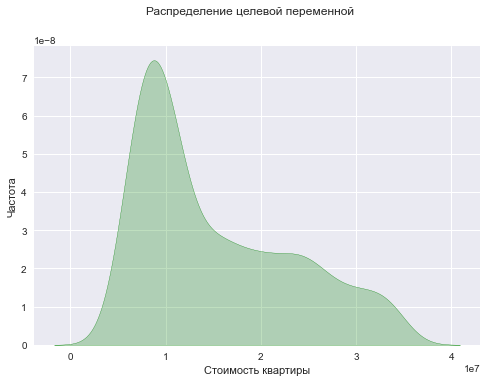

In [131]:
sns.kdeplot(df_full['Цена'] , fill = True, color = 'green')

plt.suptitle('Распределение целевой переменной')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Частота')
plt.show()

Мы видим, что график распределения целевой переменной очень похож на логонормальное распределение, причём его медиана смещена вправо.
Если рассматривать квартиры в качестве базового актива, то можно сделать вывод о том, что вероятность на рост её стоимости в перспективе будет выше, чем на падание. Соответственно, инвесторам выгоднее "лонговать" такой актив, т.е. совершать покупку с расчетом на его будущий рост. 

#### 2.  В датасете есть колонка 'Класс'. Можно предположить, что присвоенный класс жилья непосредственно оказывает влияние на формирование цены. Проанализируем распределение классов и найдем среднюю цену квартиры в каждом из них: 

In [132]:
classes = pd.pivot_table(df_full, index = 'Класс', values = 'Цена', aggfunc = [np.mean, min, max])
classes.values[:,0]

array([19446594.3972973 , 10419127.85444234, 24613515.89719626])

In [133]:
df_full['Класс'].value_counts()

Комфорт    529
Бизнес     370
Премиум    107
Name: Класс, dtype: int64

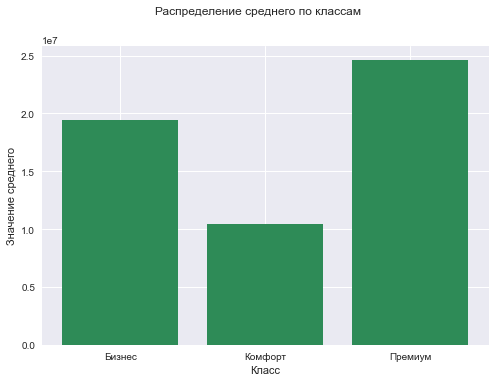

In [134]:
plt.bar(classes.index, classes.values[:,0], color = 'seagreen' )
plt.suptitle('Распределение среднего по классам')
plt.xlabel('Класс')
plt.ylabel('Значение среднего')
plt.show()

По распределению видно, что в среднем квартиры премиум класса дороже, а комфорт класса напротив дешевле

 #### 3. Проанализируем столбцы ЖК и Застройщиков :

Очевидно, что уникальных значений в столбце ЖК слишком много, чтобы как-то соотносить с динамикой цен на жилье, поэтому посмотрим на столбец застройщик в комбинации с классом жилья

In [135]:
df_full['ЖК'].nunique() 

174

In [136]:
df_full['Застройщик'].nunique()

55

Теперь давайте выясним, в каких ЖК продаются квартиры и каких классов:

In [137]:
builder_class_pivot = pd.pivot_table(df_full, index = 'Застройщик', columns = 'Класс',values = 'ЖК', aggfunc = [len],fill_value = 0 )
builder_class_pivot

len                
Класс                      Бизнес Комфорт Премиум
Застройщик                                       
3SGroup                         8       0       0
494 УНР                         0       0       1
AFI Development                 2       0       0
Absolute Premium                0       0       1
Forma                          16       0       5
GRAVION                         0       0       2
Glincom                         0       0       5
GloraX                          0       0       3
Hutton Development              0       0       3
Level Group                    38      18       0
MR Group                       39       0      24
October Group                   1       0       0
Optima Development              0       0       1
Prime Life Development          5       0       0
Regions Development             0       0       2
Seven Suns Development          0       6       0
Sezar Group                     8       0       0
Sminex-Интеко                   0       7       5
St Michael                      7       0       0
TEKTA GROUP                    12       0       3
Upside Development              0       5       0
VOS’HOD                         0       0       1
Wainbridge                      2       0       0
Ziggurat                        0       0       1
А101                           18      32       0
Абсолют Недвижимость            0      23       0
Аеон Девелопмент                4       0       6
Велесстрой                      4       0       0
ГК МИЦ                         26       8       0
ГК Новая Жизнь                  3       0       0
ГК Основа                      18       0       4
ГК ФСК                         24      15       0
Группа ЛСР                      2       0       0
Группа Родина                   9       0       2
Группа Самолет                  0       9       0
Группа Эталон                   7       0       0
ДОНСТРОЙ                       19       0       0
ДСК-1                           0       7       0
КОРТРОС                        11       0       0
Колди (Coldy)                   6       0       0
Компания Пионер                 1       0       7
Концерн КРОСТ                  10       0       4
Мангазея                        7       0       0
Новые Ватутинки                 0      20       0
ООО "СЗ "Стадион "Спартак"      0       0       2
ПИК                            30     346       0
РГ-Девелопмент                  7      23       0
СЗ Звездный                     2       0       0
СЗ Логос                        0       0       5
СЗ ПРОГРЕСС                     4       0       0
СЗ Универсаль                   0       0       8
СИТИ21                          0       0       4
СК Резиденс                    16       0       0
Ташир                           4       0       8
Э.К. Девелопмент                0      10       0

Можно заметить, что количество квартир среди застройщиков распределено неравномерно. Например,  компания ПИК представлена намного большим количеством квартир в нашей выборке.

Для большей наглядности построим график распределения классов жилья среди застройщиков.

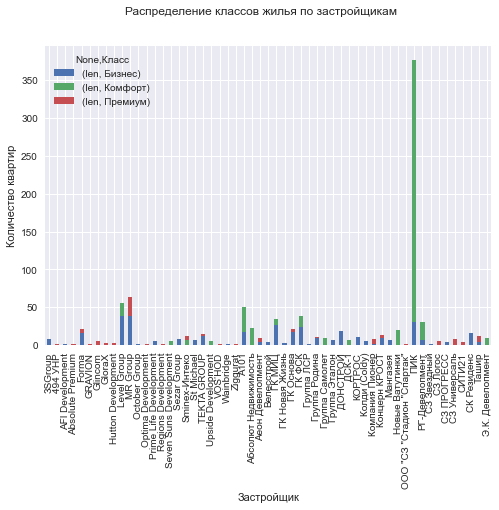

In [138]:
builder_class_pivot.plot(kind='bar', stacked=True)
plt.suptitle('Распределение классов жилья по застройщикам')
plt.ylabel('Количество квартир')
plt.show()

Мы видим, что в большинстве случаев количество квартир, построенных застройщиками, варьируется от 0 до ~25, причем среди них преобладает «бизнес» класс. 

Однако есть несколько застройщиков, количество квартир которых достигает 26-63 у.е. (Level Group, MR Group, A101, ГК ФСК, ГК МИЦ, РГ-Девелопмент). 
Самое большое количество квартир у ПИКа — больше 350. Можно отметить, что этот застройщик занимается преимущественно квартирами «комфорт» класса.

#### 4. Для более детального изучения проведем исследование по Административным округам Москвы и сопоставим полученные результаты с помощью графиков.

В первую очередь узнаем, сколько уникальных округов фигурирует в нашей модели.

In [139]:
df_full['Округ'].nunique()

13

Далее найдем количество квартир дороже и дешевле медианного значения в каждом из них. Результаты представим в виде графика:

In [140]:
target_median = df_full['Цена'].median()

In [141]:
more_expencive_median = df_full[df_full['Цена'] > target_median]
less_expencive_median = df_full[df_full['Цена'] <= target_median]

In [142]:
more_expencive_okrug_num = more_expencive_median.groupby('Округ')['Цена'].count()
less_expencive_okrug_num = less_expencive_median.groupby('Округ')['Цена'].count()

index_exp = more_expencive_okrug_num.index
index_less = less_expencive_okrug_num.index

exp_values = more_expencive_okrug_num.to_numpy()
less_values = less_expencive_okrug_num.to_numpy()

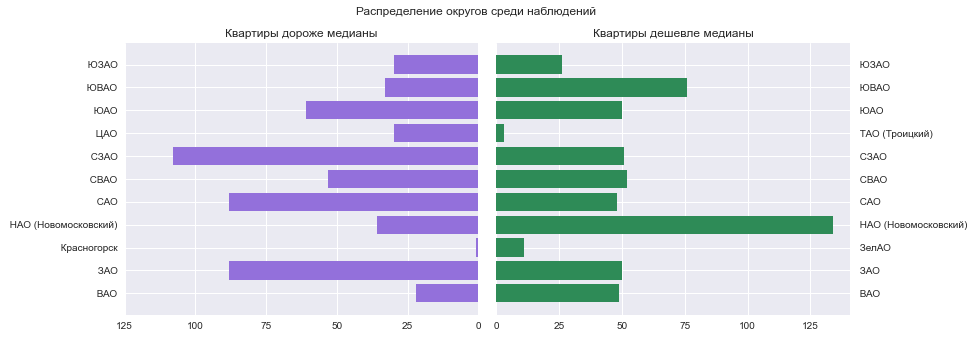

In [143]:
plt.figure(figsize=(13,5))

plt.suptitle('Распределение округов среди наблюдений')

plt.subplot(1, 2, 1)
plt.title('Квартиры дороже медианы')
plt.barh(more_expencive_okrug_num.index,more_expencive_okrug_num.to_numpy(),color='mediumpurple')
plt.gca().invert_xaxis()
plt.xticks(np.arange(0,150,25))

plt.subplot(1, 2, 2)
plt.title('Квартиры дешевле медианы')
plt.barh(less_expencive_okrug_num.index,less_expencive_okrug_num.to_numpy(),color='seagreen')
plt.xticks(np.arange(0,150,25))
plt.tick_params(bottom=True,right=True,left=False,labelright=True,labelleft=False)


plt.subplots_adjust(wspace=0.05)

plt.show()

Можно заметить, что наибольшее число квартир, соимость которых выше медианы, приходится на Северо-Западный административный округ (около 108). Следом за ним с одинаковыми значениями идут ЗАО и САО (~88 квартир). 

Что же касается квартир дешевле медианы, то следует выделить Новомосковский административный округ с ~138 квартирами. Далее со значением, меньшим почти в 1,8 раз, идет ЮВАО (около 76). 

Интересным фактом является то, что в Красногорске и ЦАО вообще нет квартир дешевле медианы. В ТАО и ЗелАО ситуация прямо противоположная.

#### 5. Выявим, от чего в большей степени зависело, будет ли цена квартиры больше или меньше медианного значения:

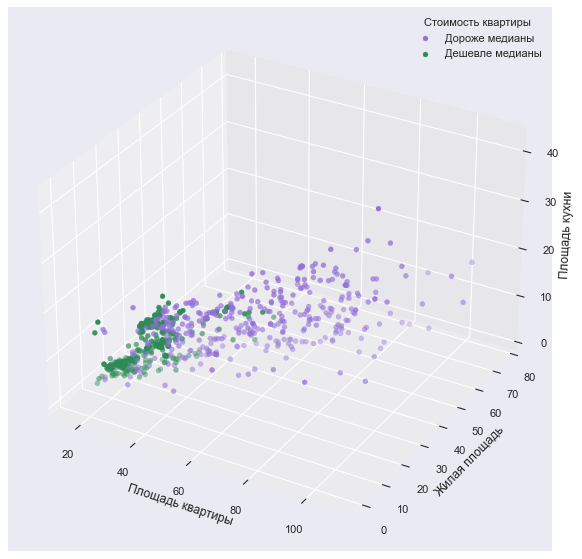

In [144]:
fig = plt.figure(dpi=80,figsize=(17,9))
ax = fig.add_subplot(projection = '3d')


mask = df_full['Цена'] > target_median
x1 = df_full['Площадь квартиры'][mask]
y1 = df_full['Жилая площадь'][mask]
z1 = df_full['Площадь кухни'][mask]
ax.scatter(x1,y1,z1,color='mediumpurple',label='Дороже медианы')

mask2 = df_full['Цена'] <= target_median
x2 = df_full['Площадь квартиры'][mask2]
y2 = df_full['Жилая площадь'][mask2]
z2 = df_full['Площадь кухни'][mask2]
ax.scatter(x2,y2,z2,color='seagreen',label='Дешевле медианы')

ax.set_ylabel('Жилая площадь')
ax.set_xlabel('Площадь квартиры')
ax.set_zlabel('Площадь кухни')
plt.legend(title='Стоимость квартиры')

plt.show()

На графике выше видно, что квартиры, которые дешевле медианного значения цены, распологаются в части с маленькой площадью кухни, квартиры в целом и жилой площади в частности.

#### 6. Проведем аналих колонок, связанных с этажами 
Существует распространенное мнение, что квартиры на 1 и последнем этажах менее привлекатльны для покупателей. Посмотрим на среднюю стоимость 1-, 2-х, 3-х и 4-х комнатных квартир в зависимости от этажа. Найдем среднюю цену квартиры на 1/последнем этажах и сравним его со средней ценой квартир, расположенных на других этажах.

Создадим отдельную таблицу для квартир на 1/последнем этажах и таблицу для квартир НЕ на 1/последнем этажах.

In [145]:
first_last_floor = pd.concat([df_full[df_full['Этаж'] == df_full['Этажей в доме']], df_full[df_full['Этаж'] == 1]])
without_first_last_floor = pd.concat([df_full, first_last_floor]).drop_duplicates(keep=False)

Визуализируем среднюю стоимость квартир на 4 графиках (1-, 2-х, 3-х, 4-х комнатные квартиры). Для этого создадим словари, в которых ключи отвечают за этажи (первый/последний, НЕ первый/последний, все этажи), а значения - средняя стоимость.

In [146]:
dict_one_first_last = {'первый или последний этаж': first_last_floor[first_last_floor['Количество комнат'] == 1]['Цена'].mean(),
        'НЕ первый или последний этаж': without_first_last_floor[without_first_last_floor['Количество комнат'] == 1]['Цена'].mean(),
        'все этажи': df_full[df_full['Количество комнат'] == 1]['Цена'].mean()}
dict_two_first_last= {'первый или последний этаж': first_last_floor[first_last_floor['Количество комнат'] == 2]['Цена'].mean(),
        'НЕ первый или последний этаж': without_first_last_floor[without_first_last_floor['Количество комнат'] == 2]['Цена'].mean(),
        'все этажи': df_full[df_full['Количество комнат'] == 2]['Цена'].mean()}
dict_three_first_last= {'первый или последний этаж': first_last_floor[first_last_floor['Количество комнат'] == 3]['Цена'].mean(),
        'НЕ первый или последний этаж': without_first_last_floor[without_first_last_floor['Количество комнат'] == 3]['Цена'].mean(),
        'все этажи': df_full[df_full['Количество комнат'] == 3]['Цена'].mean()}
dict_four_first_last= {'первый или последний этаж': first_last_floor[first_last_floor['Количество комнат'] == 4]['Цена'].mean(),
        'НЕ первый или последний этаж': without_first_last_floor[without_first_last_floor['Количество комнат'] == 4]['Цена'].mean(),
        'все этажи': df_full[df_full['Количество комнат'] == 4]['Цена'].mean()}

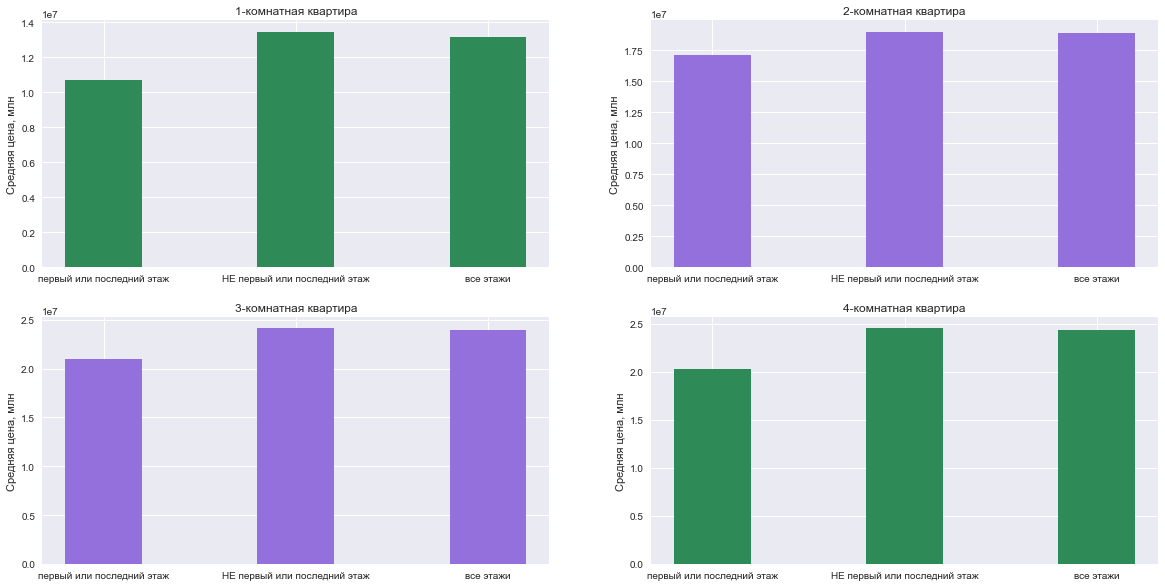

In [147]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.bar(dict_one_first_last.keys(), dict_one_first_last.values(), width = 0.4, color = 'seagreen')
plt.ylabel('Средняя цена, млн')
plt.title('1-комнатная квартира')

plt.subplot(2, 2, 2)
plt.bar(dict_two_first_last.keys(), dict_two_first_last.values(), width = 0.4, color = 'mediumpurple' )
plt.ylabel('Средняя цена, млн')
plt.title('2-комнатная квартира')

plt.subplot(2, 2, 3)
plt.bar(dict_three_first_last.keys(), dict_three_first_last.values(), width = 0.4, color = 'mediumpurple')
plt.ylabel('Средняя цена, млн')
plt.title('3-комнатная квартира')

plt.subplot(2, 2, 4)
plt.bar(dict_four_first_last.keys(), dict_four_first_last.values(), width = 0.4, color = 'seagreen')
plt.ylabel('Средняя цена, млн')
plt.title('4-комнатная квартира')

plt.subplots_adjust(wspace=0.2)

Как можно заметить, действительно, в среднем квартиры на 1/последнем этажах дешевле квартир на остальных этажах. Впоследствии мы попробуем проверить эту гипотезу.

#### 7. Посмотрим на ситуацию с типами квартир

Интересно посмотреть, как на конечную цену квартиры влияет не только количество комант и квадратура, но и ее тип. Например, апартаменты не предоставлют возможность оформить прописку ее владельцу, что несомненно сказывается на привлекательности таких квартир для покупателей. Студии обычно имеют не самую удобную планировку, поэтому на них цены тоже должны быть ниже.

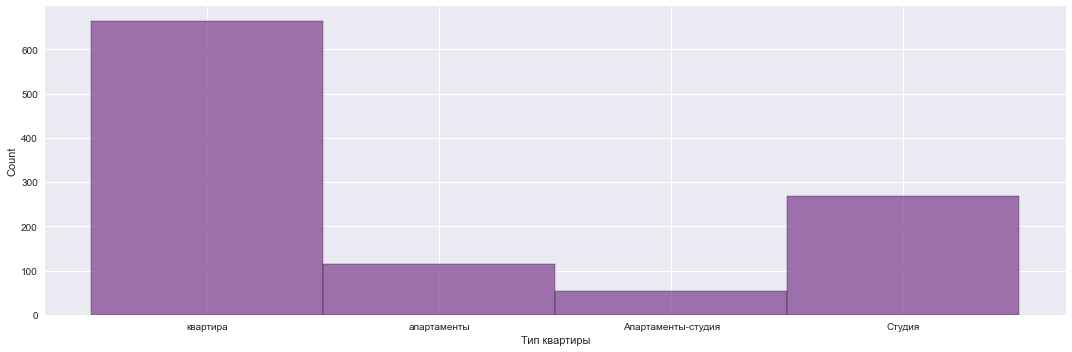

In [148]:
sns.set_palette('PRGn' )
sns.displot(data = df_full, x ='Тип квартиры', aspect = 3)

plt.show()

В выборке преобладают обычные квартиры, их количество наибольшее ну и на них предосталется самый большой спрос на рынке недвижимости в принципе. Теперь посмотрим на распределение средней цены, наибольшей цены и наименьшей цены

In [149]:
flat_type_pivot = pd.pivot_table(df_full, index = 'Тип квартиры', values = 'Цена', aggfunc = [np.mean, min, max])
flat_type_pivot

,mean,min,max
,Цена,Цена,Цена
Тип квартиры,,,
Апартаменты-студия,1.137822e+07,4525404,34227313
Студия,8.600528e+06,4299137,25386604
апартаменты,1.794481e+07,6782248,34069999
квартира,1.785063e+07,5346810,34882092


In [150]:
apart_st = {'mean': df_full[df_full['Тип квартиры'] == 'Апартаменты-студия']['Цена'].mean(), 
            'min':df_full[df_full['Тип квартиры'] == 'Апартаменты-студия']['Цена'].min(), 
            'max':df_full[df_full['Тип квартиры'] == 'Апартаменты-студия']['Цена'].max()}
st = {'mean': df_full[df_full['Тип квартиры'] == 'Студия']['Цена'].mean(), 
            'min':df_full[df_full['Тип квартиры'] == 'Студия']['Цена'].min(), 
            'max':df_full[df_full['Тип квартиры'] == 'Студия']['Цена'].max()}
apart = {'mean': df_full[df_full['Тип квартиры'] == 'апартаменты']['Цена'].mean(), 
            'min':df_full[df_full['Тип квартиры'] == 'апартаменты']['Цена'].min(), 
            'max':df_full[df_full['Тип квартиры'] == 'апартаменты']['Цена'].max()}
flat = {'mean': df_full[df_full['Тип квартиры'] == 'квартира']['Цена'].mean(), 
            'min':df_full[df_full['Тип квартиры'] == 'квартира']['Цена'].min(), 
            'max':df_full[df_full['Тип квартиры'] == 'квартира']['Цена'].max()}

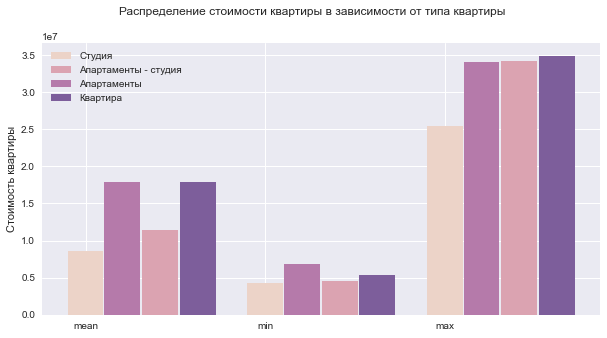

In [151]:
sns.set_palette("ch:s=-.7,r=.7")
plt.figure(figsize = (10,5))

plt.bar(st.keys(), st.values(), width = 0.2, label = 'Студия' )
plt.bar(np.arange(0,3,1)+ 0.415, apart_st.values(), width = 0.2, label = 'Апартаменты - студия' )
plt.bar(np.arange(0,3,1) +0.205, apart.values(), width = 0.2, label = 'Апартаменты')
plt.bar(np.arange(0,3,1) +0.625, flat.values(), width = 0.2, label = 'Квартира')

plt.suptitle('Распределение стоимости квартиры в зависимости от типа квартиры')
plt.ylabel('Стоимость квартиры')
plt.legend()
plt.show()

Визуализация данных о соотношении типов квартир и цены частично подтвердило наше предположение. Рассматривая максимальные цены на обычные квартиры действительно занимают лидирующую позицию. Тем не менее возникло интересное наблюдение насчет апартаментов, которые по нашему предположению должны быть дешевле, но по результатам оказалось, что их цены в среднем не уступают квартирным.Самыми дешевыми по всем рассматриваемым параметрам оказались студии.

#### 8. Перейдем к оставшимся категориальным признакам, типу дома и парковки 

Будем анализировать их относительно медианной цены квартиры. Выведем распределение типов отделки квартиры среди квртир дешевле медианы и дороже

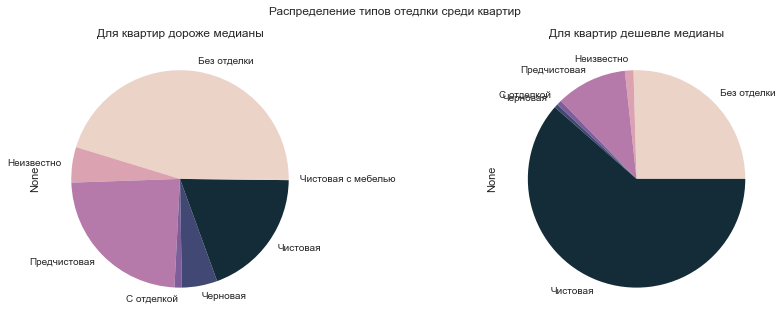

In [152]:
plt.figure(figsize=(15, 5))

otdelka_more = more_expencive_median.groupby('Отделка').size()
otdelka_less = less_expencive_median.groupby('Отделка').size()

plt.subplot(1, 2, 1)
otdelka_more.plot(kind='pie', subplots=True)
plt.title('Для квартир дороже медианы')

plt.subplot(1, 2,2)
otdelka_less.plot(kind='pie', subplots=True)
plt.title('Для квартир дешевле медианы')

plt.suptitle('Распределение типов отедлки среди квартир')
plt.show()

На представленных диаграммах виден тренд на преобладание квартир без отделки среди тех, что дороже медианного значения и квартир с чистовой отделкой среди тех, что дешевле. Неожиданный результат. Получается, что отделка не имеет сильного влияния на таргет.

Напоследок посмотрим на распределение типа парковки и целевой переменной.

In [153]:
df_full['Парковка'].unique()

array(['Подземная', 'Подземная, гостевая', nan, 'Гостевая',
       'Отдельная многоуровневая, гостевая',
       'Подземная, отдельная многоуровневая, гостевая', '-',
       'Отдельная многоуровневая', 'Подземная, отдельная многоуровневая'],
      dtype=object)

In [154]:
more_less_median = df_full
more_less_median['Индикатор отношения к медиане'] = np.where(mask,1,0 )

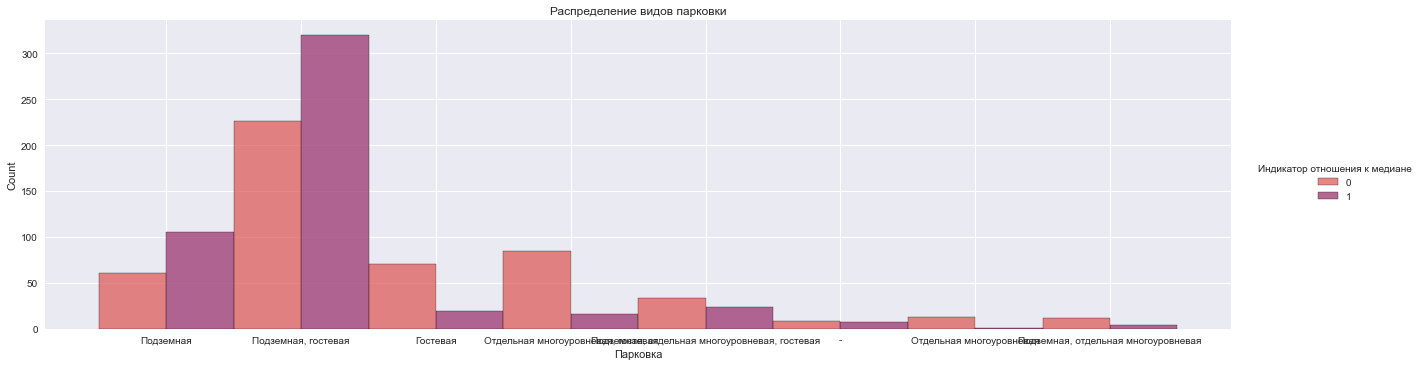

In [155]:
z = sns.displot(data = more_less_median, x = 'Парковка',hue = 'Индикатор отношения к медиане', 
                multiple='dodge', palette = "flare", aspect = 3.5,
               ).set(title= 'Распределение видов парковки' )

plt.show()

По графику видно, что среди обоих классов преобладает подземная, гостевая парковка .

## Описательные статистики

Для того чтобы иметь чёткое представление о распределении значений в нашем датасете, нам необходимо оценить все доступные числовые данные и получить сводную статистику о них.

In [156]:
df_full.describe()

,Время до метро,Метро рядом,Этаж,Этажей в доме,Количество комнат,Площадь квартиры,Жилая площадь,Площадь кухни,Год сдачи,Цена,Индикатор отношения к медиане
count,1090.000000,1100.000000,1100.000000,1100.000000,778.000000,1100.000000,901.000000,826.000000,1100.000000,1.100000e+03,1100.000000
mean,5.962385,2.844545,11.086364,24.415455,1.884319,44.706655,20.333629,11.724697,2023.892727,1.528647e+07,0.500000
std,4.319373,0.431281,8.945431,10.313782,0.851669,20.446706,12.424390,6.422809,1.121930,8.123496e+06,0.500227
min,1.000000,0.000000,1.000000,3.000000,1.000000,15.900000,0.300000,1.200000,2018.000000,4.299137e+06,0.000000
25%,3.000000,3.000000,3.000000,17.000000,1.000000,27.700000,11.200000,5.700000,2023.000000,8.746150e+06,0.000000
50%,5.000000,3.000000,9.000000,23.000000,2.000000,38.700000,14.500000,10.900000,2024.000000,1.197466e+07,0.500000
75%,6.000000,3.000000,16.000000,32.000000,2.000000,59.150000,26.500000,16.600000,2025.000000,2.122115e+07,1.000000
max,31.000000,3.000000,46.000000,69.000000,4.000000,111.860000,76.700000,42.200000,2026.000000,3.488209e+07,1.000000


In [157]:
df_full.describe(include='object') 

,Округ,Ближайшая станция метро,Застройщик,ЖК,Класс,Тип квартиры,Отделка,Тип дома,Парковка
count,1100,1090,1006,1083,1006,1100,1100,1006,1006
unique,13,129,55,174,3,4,7,7,8
top,НАО (Новомосковский),Филатов Луг,ПИК,«Второй Нагатинский»,Комфорт,квартира,Чистовая,Монолитный,"Подземная, гостевая"
freq,170,44,376,19,529,664,444,618,546


Далее посчитаем достаточно распространенную величину в вопросах выбора квартиры - __стоимость 1 кв метра__:

In [158]:
square_metr = df_full['Цена']/df_full['Площадь квартиры']
square_metr

0       500206.987578
1       335472.326259
2       491033.014354
3       524547.476636
4       525261.002088
            ...      
1334    298420.054201
1335    210755.916031
1337    320674.985673
1338    210752.003781
1339    219573.996063
Length: 1100, dtype: float64

Давайте присоединим столбик с ценами за 1 кв.м. к основному датафрему со всеми данными

In [159]:
square_metr.to_csv ('price_square_metr.csv', index= False)

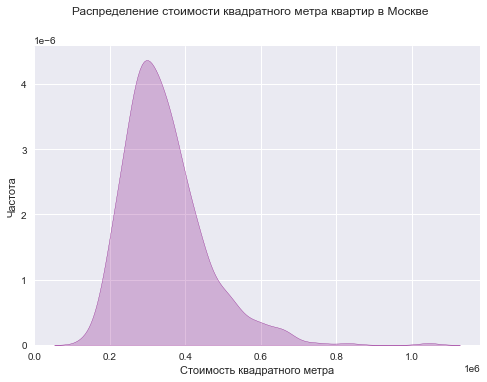

In [160]:
sns.kdeplot(square_metr , fill = True, color = 'purple')
plt.ylabel('Частота')
plt.xlabel('Стоимость квадратного метра')
plt.suptitle('Распределение стоимости квадратного метра квартир в Москве')

plt.show()

Полученные значения похожи на график нормального распределения. Это говорит о том, что в нашей выборке большинство значений близки к среднему, а крайних значений признака не так много, что может послужить доказательством репрезентативности выбранных данных. Таким образом, в дальнейшем исследовании, в частности, при проверке гипотез более релевантно использовать в качестве таргета стоимость квадратного метра, если тест не связан непосредственно с влиянием площади на целевую переменную.

## Значимость признаков

Выведем матрицу корреляций вещественных призанаков:

In [161]:
matrix_corr = df_full.corr()
matrix_corr

,Время до метро,Метро рядом,Этаж,Этажей в доме,Количество комнат,Площадь квартиры,Жилая площадь,Площадь кухни,Год сдачи,Цена,Индикатор отношения к медиане
Время до метро,1.000000,-0.360479,-0.042797,-0.063846,-0.053919,-0.004625,0.009323,0.031573,-0.038732,0.001791,-0.015544
Метро рядом,-0.360479,1.000000,0.041691,-0.020243,-0.009478,-0.098936,-0.092236,-0.046983,0.146034,-0.150702,-0.115987
Этаж,-0.042797,0.041691,1.000000,0.429789,-0.038730,-0.037154,-0.078319,-0.014642,-0.054925,0.013511,-0.029383
Этажей в доме,-0.063846,-0.020243,0.429789,1.000000,-0.023342,0.007487,-0.035699,0.007162,0.188412,0.121086,0.090564
Количество комнат,-0.053919,-0.009478,-0.038730,-0.023342,1.000000,0.836287,0.869039,0.054872,-0.079241,0.526577,0.493391
Площадь квартиры,-0.004625,-0.098936,-0.037154,0.007487,0.836287,1.000000,0.887300,0.574955,-0.200601,0.797701,0.696865
Жилая площадь,0.009323,-0.092236,-0.078319,-0.035699,0.869039,0.887300,1.000000,0.228951,-0.269351,0.691485,0.644835
Площадь кухни,0.031573,-0.046983,-0.014642,0.007162,0.054872,0.574955,0.228951,1.000000,-0.023037,0.429540,0.383388
Год сдачи,-0.038732,0.146034,-0.054925,0.188412,-0.079241,-0.200601,-0.269351,-0.023037,1.000000,-0.217396,-0.233470
Цена,0.001791,-0.150702,0.013511,0.121086,0.526577,0.797701,0.691485,0.429540,-0.217396,1.000000,0.819645


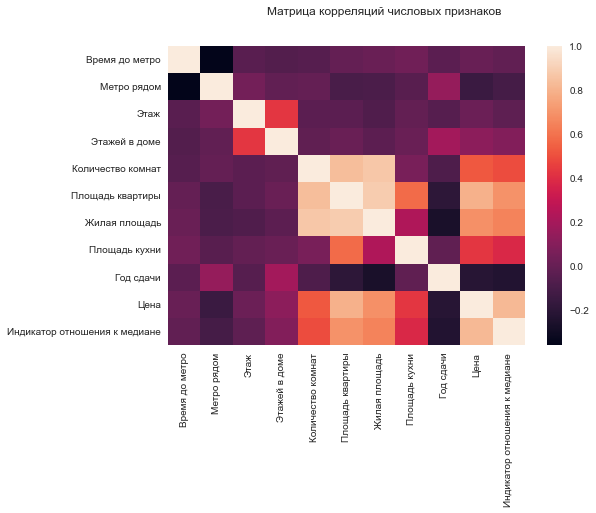

In [162]:
sns.heatmap(matrix_corr)
plt.suptitle('Матрица корреляций числовых признаков')
plt.show()

In [163]:
abs(matrix_corr['Цена']).sort_values()

Время до метро                   0.001791
Этаж                             0.013511
Этажей в доме                    0.121086
Метро рядом                      0.150702
Год сдачи                        0.217396
Площадь кухни                    0.429540
Количество комнат                0.526577
Жилая площадь                    0.691485
Площадь квартиры                 0.797701
Индикатор отношения к медиане    0.819645
Цена                             1.000000
Name: Цена, dtype: float64

Можно заметить, что самую сильную отрицательную линейную корреляцию с ценой квартиры имеет год её сдачи, т.е. чем ближе срок сдачи, тем выше стоимость.

Самая ярко выраженная положительная линейная зависимость с признаком «Площадь квартиры» — почти 0,8; далее следует значение именно «Жилой площади» (~0,7). Это говорит о том, что в большинстве случаев главной характеристикой, по которой определяется цена квартиры, является её квадратура.

Также стоит отметить, что наименьшее влияние на стоимость оказывает отдаленность квартиры от метро (~0.002).

## Работа с пропусками

In [164]:
X = df_full.iloc[:,:-2]
y = df_full['Цена']

In [165]:
X.isnull().sum()

Округ                        0
Ближайшая станция метро     10
Время до метро              10
Метро рядом                  0
Застройщик                  94
ЖК                          17
Класс                       94
Тип квартиры                 0
Этаж                         0
Этажей в доме                0
Отделка                      0
Количество комнат          322
Площадь квартиры             0
Жилая площадь              199
Площадь кухни              274
Тип дома                    94
Парковка                    94
Год сдачи                    0
dtype: int64

Заполним пропуски в категориальных признаках пустыми строками, так как подобная ситуация свидетельствует об отсутствии данных признаков на сайте, откуда производился парсинг (это не говорит, что у конкретной квартиры нет этого признака, она просто не была указана в объявлении). 

Заполнять его наиболее часто встречающимся значением относительно опасно, потому что у каждой квартиры достаточно специфические характеристики, заполнение которыми может испортить исследуемую модель. Следовательно, наиболее рациональным будет предложенный нами вариант.

Что же касается вещественных признаков, то их заполним средними значениями.

Кроме того, в рассматриваемом датасете есть признаки, которые могут быть только целыми числами — их заполним медианами.

Таким образом, с помощью всех вышеописанных манипуляций мы сможем сделать нашу модель наиболее полной, при этом не испортив её.

In [166]:
numeric_data = X.select_dtypes([np.number])

numeric_data_int = numeric_data[['Метро рядом', 'Этаж', 'Этажей в доме', 'Количество комнат','Год сдачи']]
numeric_data_float = numeric_data[['Площадь квартиры', 'Жилая площадь', 'Площадь кухни']]

numeric_data_int_median = numeric_data_int.median()
numeric_data_float_mean = numeric_data_float.mean()

int_features = numeric_data_int.columns
float_features = numeric_data_float.columns

X[int_features] = X[int_features].fillna(numeric_data_int_median)
X[float_features] = X[float_features].fillna(numeric_data_float_mean)

In [167]:
categorical_features = X.dtypes[X.dtypes == "object"].index

X[categorical_features] = X[categorical_features].fillna('')

In [168]:
X.isnull().sum()

Округ                       0
Ближайшая станция метро     0
Время до метро             10
Метро рядом                 0
Застройщик                  0
ЖК                          0
Класс                       0
Тип квартиры                0
Этаж                        0
Этажей в доме               0
Отделка                     0
Количество комнат           0
Площадь квартиры            0
Жилая площадь               0
Площадь кухни               0
Тип дома                    0
Парковка                    0
Год сдачи                   0
dtype: int64

На данном этапе есть небольшой нюанс: исходя из здравого смысла, будет некорректно заполнить, например, пропуски в колонке количество комнат в квартире у студии значением, большим 1. 

In [169]:
X[(X['Количество комнат'] > 1) & (X['Тип квартиры'] == 'Студия')]

,Округ,Ближайшая станция метро,Время до метро,Метро рядом,Застройщик,ЖК,Класс,Тип квартиры,Этаж,Этажей в доме,Отделка,Количество комнат,Площадь квартиры,Жилая площадь,Площадь кухни,Тип дома,Парковка,Год сдачи
74,ЗАО,Фили,10.0,3,Аеон Девелопмент,«River Park Towers Кутузовский (Ривер Парк Тау...,Премиум,Студия,3.0,46.0,Черновая,2.0,40.50,20.333629,11.724697,Монолитно-кирпичный,Подземная,2026.0
133,СЗАО,Трикотажная,4.0,3,СК Резиденс,«ÁLIA (АЛИЯ)»,Бизнес,Студия,3.0,22.0,Без отделки,2.0,24.00,20.333629,11.724697,Монолитно-кирпичный,"Подземная, гостевая",2025.0
144,САО,Тимирязевская,3.0,3,MR Group,«SYMPHONY 34 (Симфони 34)»,Премиум,Студия,2.0,36.0,Чистовая,2.0,26.21,14.600000,3.600000,Монолитный,"Подземная, гостевая",2025.0
147,ЗАО,Лужники,3.0,3,MR Group,«Hide («Хайд»)»,Премиум,Студия,6.0,41.0,Предчистовая,2.0,32.10,20.333629,11.724697,Монолитно-кирпичный,"Подземная, гостевая",2023.0
170,САО,Красный Балтиец,4.0,3,,«SOUL (Соул)»,,Студия,13.0,20.0,Предчистовая,2.0,24.40,13.300000,2.300000,,,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,СЗАО,Тушинская,3.0,3,MR Group,«City Bay (Сити Бэй)»,Бизнес,Студия,17.0,52.0,Предчистовая,2.0,27.05,16.400000,11.724697,Монолитный,Подземная,2023.0
1308,ЗАО,Мичуринский проспект,4.0,2,,,,Студия,14.0,21.0,Предчистовая,2.0,26.80,15.700000,3.600000,,,2024.0
1319,ЗАО,Аминьевская,3.0,2,October Group,«Stories на Мосфильмовской (Сторис)»,Бизнес,Студия,6.0,11.0,Без отделки,2.0,22.70,11.700000,11.724697,Монолитный,Подземная,2026.0
1324,СЗАО,Волоколамская,2.0,3,MR Group,«City Bay (Сити Бэй)»,Бизнес,Студия,42.0,53.0,Предчистовая,2.0,23.90,0.300000,18.600000,Монолитный,Подземная,2025.0


In [170]:
X.loc[(X['Количество комнат'] > 1) & (X['Тип квартиры'] == 'Студия'), 'Количество комнат'] = 1

In [171]:
X[(X['Количество комнат'] > 1) & (X['Тип квартиры'] == 'Студия')] 

,Округ,Ближайшая станция метро,Время до метро,Метро рядом,Застройщик,ЖК,Класс,Тип квартиры,Этаж,Этажей в доме,Отделка,Количество комнат,Площадь квартиры,Жилая площадь,Площадь кухни,Тип дома,Парковка,Год сдачи


In [172]:
df_without_miss = X.join(y)
df_without_miss

,Округ,Ближайшая станция метро,Время до метро,Метро рядом,Застройщик,ЖК,Класс,Тип квартиры,Этаж,Этажей в доме,Отделка,Количество комнат,Площадь квартиры,Жилая площадь,Площадь кухни,Тип дома,Парковка,Год сдачи,Цена
0,СВАО,Марьина роща,17.0,2,Компания Пионер,«PRIDE (Прайд)»,Премиум,квартира,5.0,22.0,Без отделки,1.0,32.20,20.333629,11.724697,Монолитный,Подземная,2025.0,16106665
1,СЗАО,Трикотажная,4.0,3,СК Резиденс,«ÁLIA (АЛИЯ)»,Бизнес,квартира,2.0,26.0,Неизвестно,1.0,48.06,20.333629,11.724697,Монолитно-кирпичный,"Подземная, гостевая",2023.0,16122800
2,САО,Тимирязевская,3.0,3,MR Group,«SYMPHONY 34 (Симфони 34)»,Премиум,квартира,2.0,36.0,Чистовая,1.0,37.62,12.800000,3.100000,Монолитный,"Подземная, гостевая",2025.0,18472662
3,ЗАО,Фили,5.0,3,Аеон Девелопмент,«River Park Towers Кутузовский (Ривер Парк Тау...,Премиум,квартира,2.0,45.0,Без отделки,1.0,42.80,20.333629,11.724697,Монолитно-кирпичный,Подземная,2026.0,22450632
4,САО,Белорусская,4.0,3,MR Group,«Комплекс апартаментов Slava (Слава)»,Премиум,апартаменты,2.0,16.0,Предчистовая,1.0,47.90,20.333629,11.724697,Монолитно-кирпичный,"Подземная, гостевая",2023.0,25160002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,НАО (Новомосковский),Ольховая,17.0,3,Группа Родина,«Russian Design District (Рашен Дизайн Дистрикт)»,Бизнес,квартира,12.0,13.0,Без отделки,1.0,36.90,12.200000,11.400000,Монолитно-кирпичный,"Подземная, гостевая",2023.0,11011700
1335,НАО (Новомосковский),Рассказовка,2.0,3,Абсолют Недвижимость,«Переделкино Ближнее Город-парк»,Комфорт,квартира,1.0,9.0,Без отделки,2.0,52.40,26.300000,11.724697,"Панельный, монолитный","Отдельная многоуровневая, гостевая",2025.0,11043610
1337,СЗАО,Спартак,5.0,3,ПИК,«Holland park (Холланд парк)»,Комфорт,квартира,2.0,13.0,Без отделки,1.0,34.90,10.600000,16.100000,Монолитный,"Подземная, гостевая",2024.0,11191557
1338,САО,Водники,12.0,3,ДСК-1,«Первый Ленинградский»,Комфорт,квартира,2.0,14.0,Предчистовая,2.0,52.90,25.500000,10.600000,Панельный,"Отдельная многоуровневая, гостевая",2023.0,11148781


## Планы на будущее

Мы хотели бы обучить линейную и нелинейную (деревья, может быть бустинг) модели. 
В качестве гипотез мы скорее всего будем брать гипотезы о том, как влияют признаки, на целевую метку и влияют ли вообще

__Доделать еду и остальное__
___Проверить важность признаков, индикатор соотношения этажа квартиры и количества этажей в доме, если первый или последний этаж единичка,__

__Гипотезы:__
- Квартиры на первом и последнем этажах в среднем дешевле, чем остальные
- В среднем в ЮЗАО и СВАО разброс цен на квартиры больше, чем, например, в НАО, СЗАО и ЗАО, так как в первых двух почти одинакове количество квартир как выше медианного значения, так и ниже, в отличие от последних
- мат ожидание цены апартов / апартов-студии меньше других типов квартиры
- Гипотеза о равенстве матожиданий цен на апартаменты и обыччные квартиры
- матожидание цены квартиры с отделкой меньше, чем матожидание квартиры без отделки

Давайте создадим новый файл со всеми данными без пропусков, а также присоединим к нему столбик с ценами за 1 кв.м для дальнейшей работы с ним и проверки гипотез

In [173]:
df_without_miss.insert(loc= 19 , column='Цена за 1 кв.м', value=square_metr)

In [174]:
df_without_miss.to_csv('data_without_miss.csv', index= False)